In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Ben\Desktop\Career Foundry Tasks\Instacart Basket Analysis 02-2023'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity.pkl'))

In [4]:
df[["Age", "income", "n_dependants"]].describe()

,Age,income,n_dependants
count,3.096456e+07,3.096456e+07,3.096456e+07
mean,4.946803e+01,9.967587e+04,1.501819e+00
std,1.848528e+01,4.314187e+04,1.118896e+00
min,1.800000e+01,2.590300e+04,0.000000e+00
25%,3.300000e+01,6.729200e+04,1.000000e+00
50%,4.900000e+01,9.676500e+04,2.000000e+00
75%,6.500000e+01,1.281020e+05,3.000000e+00
max,8.100000e+01,5.939010e+05,3.000000e+00


In [6]:
# Profile variable for Age

df.loc[df['Age'] >= 60, 'age_group'] = 'Senior'

In [10]:
df.loc[(df['Age'] < 60) & (df['Age'] >= 35), 'age_group'] = 'Middle Aged'

In [11]:
df.loc[df['Age'] < 35, 'age_group'] = 'Young Adult'

In [12]:
df['age_group'].value_counts(dropna = False)

Middle Aged    12147765
Senior         10574504
Young Adult     8242295
Name: age_group, dtype: int64

In [25]:
# Profile variable for income

df.loc[df['income'] >= 115000, 'income_group'] = 'High Income'

In [26]:
df.loc[(df['income'] < 115000) & (df['income'] >= 75000), 'income_group'] = 'Middle Income'

In [20]:
df.loc[df['income'] < 75000, 'income_group'] = 'Low Income'

In [27]:
df['income_group'].value_counts(dropna = False)

Middle Income    10703822
High Income      10354062
Low Income        9906680
Name: income_group, dtype: int64

In [29]:
df['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [31]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [32]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [52]:
# Profile variable for income and number of dependents

df.loc[(df['income_group'] == 'High Income') & (df['n_dependants'] < 1), 'income_dependents'] = 'High Income No Dependents'

In [53]:
df.loc[(df['income_group'] == 'High Income') & (df['n_dependants'] >= 1), 'income_dependents'] = 'High Income With Dependents'

In [54]:
df.loc[(df['income_group'] == 'Middle Income') & (df['n_dependants'] < 1), 'income_dependents'] = 'Middle Income No Dependents'

In [55]:
df.loc[(df['income_group'] == 'Middle Income') & (df['n_dependants'] >= 1), 'income_dependents'] = 'Middle Income With Dependents'

In [56]:
df.loc[(df['income_group'] == 'Low Income') & (df['n_dependants'] < 1), 'income_dependents'] = 'Low Income No Dependents'

In [57]:
df.loc[(df['income_group'] == 'Low Income') & (df['n_dependants'] >= 1), 'income_dependents'] = 'Low Income With Dependents'

In [58]:
df['income_dependents'].value_counts(dropna = False)

Middle Income With Dependents    8040848
High Income With Dependents      7751963
Low Income With Dependents       7432072
Middle Income No Dependents      2662974
High Income No Dependents        2602099
Low Income No Dependents         2474608
Name: income_dependents, dtype: int64

In [59]:
# Profile variable for age group and number of dependents

df.loc[(df['age_group'] == 'Senior') & (df['n_dependants'] < 1), 'age_dependents'] = 'Senior No Dependents'

In [60]:
df.loc[(df['age_group'] == 'Senior') & (df['n_dependants'] >= 1), 'age_dependents'] = 'Senior With Dependents'

In [61]:
df.loc[(df['age_group'] == 'Middle Aged') & (df['n_dependants'] < 1), 'age_dependents'] = 'Middle Aged No Dependents'

In [62]:
df.loc[(df['age_group'] == 'Middle Aged') & (df['n_dependants'] >= 1), 'age_dependents'] = 'Middle Aged With Dependents'

In [63]:
df.loc[(df['age_group'] == 'Young Adult') & (df['n_dependants'] < 1), 'age_dependents'] = 'Young Adult No Dependents'

In [64]:
df.loc[(df['age_group'] == 'Young Adult') & (df['n_dependants'] >= 1), 'age_dependents'] = 'Young Adult With Dependents'

In [65]:
df['age_dependents'].value_counts(dropna = False)

Middle Aged With Dependents    9116913
Senior With Dependents         7929233
Young Adult With Dependents    6178737
Middle Aged No Dependents      3030852
Senior No Dependents           2645271
Young Adult No Dependents      2063558
Name: age_dependents, dtype: int64

Text(0, 0.5, 'Customers in Millions')

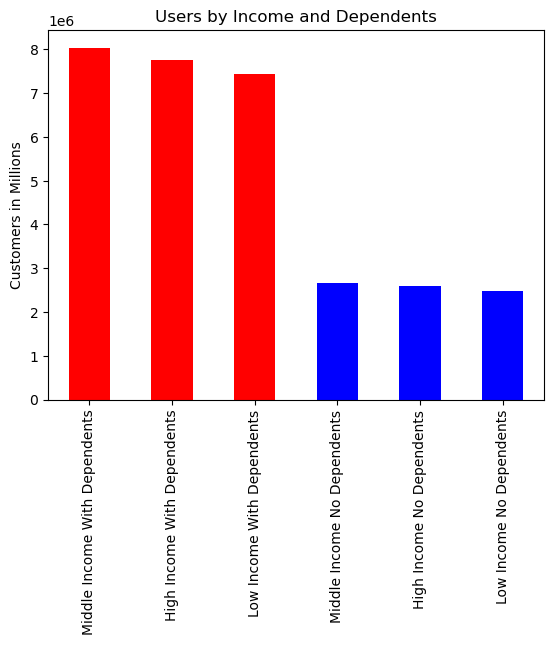

In [94]:
# Bar chart for income and dependents

inc_dep_bar = df['income_dependents'].value_counts().plot.bar(color = ['red', 'red', 'red', 'blue', 'blue', 'blue'])
plt.title('Users by Income and Dependents')
plt.ylabel('Customers in Millions')

Text(0, 0.5, 'Customers in Millions')

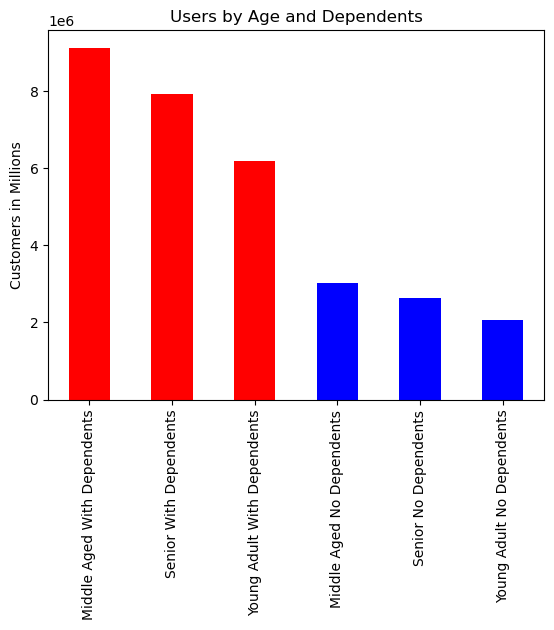

In [95]:
# Bar chart for age and dependents

inc_age_dep = df['age_dependents'].value_counts().plot.bar(color = ['red', 'red', 'red', 'blue', 'blue', 'blue'])
plt.title('Users by Age and Dependents')
plt.ylabel('Customers in Millions')

In [114]:
crosstab_region_id = pd.crosstab(df['Region'], df['income_dependents'], dropna = False)

In [78]:
crosstab_region_id

income_dependents,High Income No Dependents,High Income With Dependents,Low Income No Dependents,Low Income With Dependents,Middle Income No Dependents,Middle Income With Dependents
Region,,,,,,
Midwest,619808,1851222,563779,1736750,639229,1850725
Northeast,447920,1383847,448807,1281199,457755,1445157
South,867047,2546493,831777,2481840,883109,2700873
West,667324,1970401,630245,1932283,682881,2044093


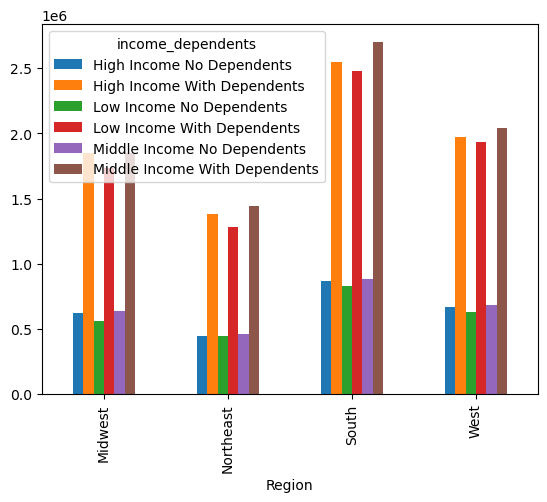

In [140]:
# Bar chart for income/dependents by region

bar_inc_dep_reg = crosstab_region_id.plot.bar()

Text(0.5, 1.0, 'Hourly Volume')

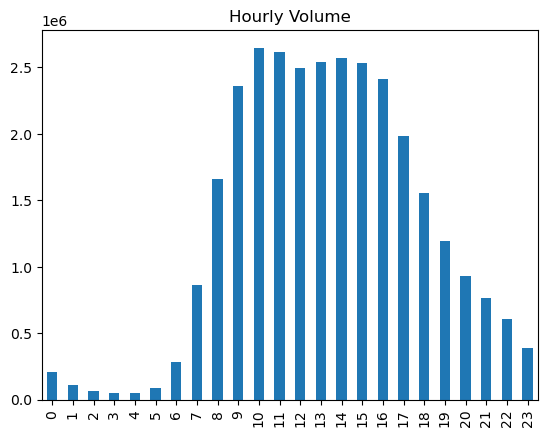

In [141]:
# Bar chart for hourly volume

bar_hourly_volume = df['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Hourly Volume')

In [107]:
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [108]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [109]:
df_dep_merge = df.merge(df_dep, on = 'department_id')

In [110]:
df_dep_merge['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [121]:
df_top_dep = df_dep_merge.loc[df_dep_merge['department_id'].isin([4,16,19,7,1])]

In [123]:
crosstab_region_dep = pd.crosstab(df_top_dep['Region'], df_top_dep['department'], dropna = False)

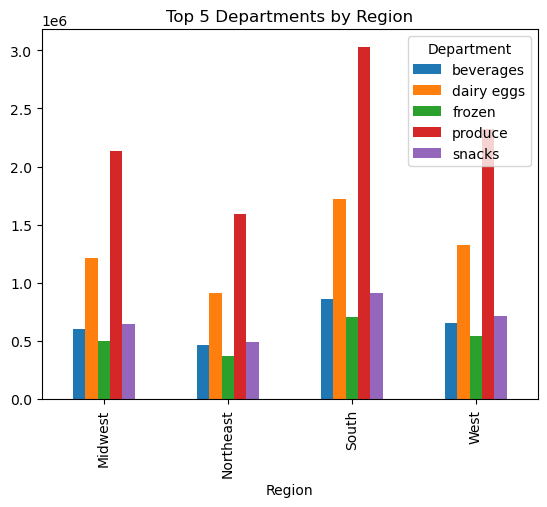

In [138]:
# Top 5 departments by region bar chart

bar_region_dep = crosstab_region_dep.plot.bar()
plt.title('Top 5 Departments by Region')
bar_region_dep.legend(title = 'Department', loc = 'upper right')

In [136]:
crosstab_age_dep = pd.crosstab(df_top_dep['age_group'], df_top_dep['department'], dropna = False)

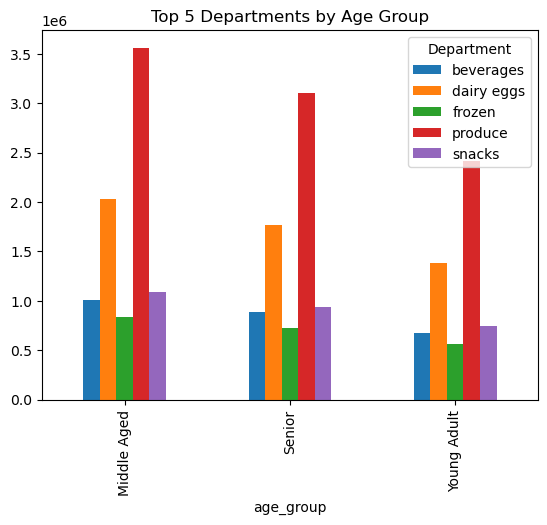

In [139]:
# Top 5 departments by age group bar chart

bar_age_dep = crosstab_age_dep.plot.bar()
plt.title('Top 5 Departments by Age Group')
bar_age_dep.legend(title = 'Department')

In [158]:
crosstab_region_dow = pd.crosstab(df['Region'], df['order_dow'], dropna = False)

Text(0.5, 1.0, 'Daily Volume by Region')

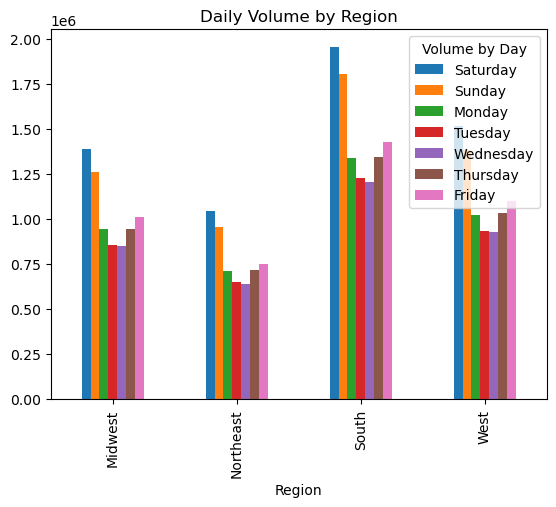

In [166]:
order_dow = crosstab_region_dow.sort_index().plot.bar()
order_dow.legend(title = 'Volume by Day', loc = 'upper right', labels = ['Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Daily Volume by Region')

In [172]:
crosstab_loyalty_dow = pd.crosstab(df['loyalty_flag'], df['order_dow'], dropna = False)

Text(0.5, 1.0, 'Daily Volume by Loyalty Status')

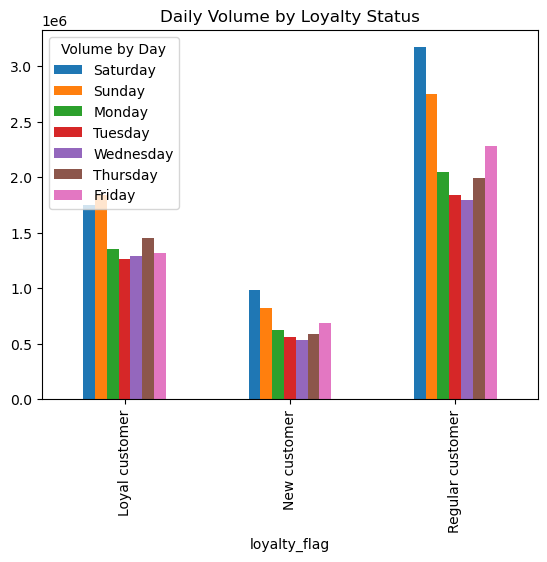

In [176]:
loyalty_dow = crosstab_loyalty_dow.sort_index().plot.bar()
loyalty_dow.legend(title = 'Volume by Day', loc = 'upper left', labels = ['Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Daily Volume by Loyalty Status')

In [178]:
crosstab_age_dow = pd.crosstab(df_top_dep['age_group'], df_top_dep['order_dow'], dropna = False)

Text(0.5, 1.0, 'Daily Volume by Age Group')

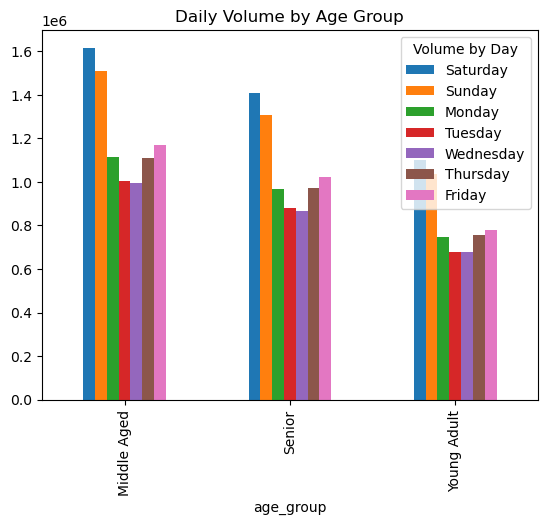

In [180]:
age_dow = crosstab_age_dow.sort_index().plot.bar()
age_dow.legend(title = 'Volume by Day', loc = 'upper right', labels = ['Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Daily Volume by Age Group')

In [185]:
crosstab_dep_hod = pd.crosstab(df_top_dep['order_dow'], df_top_dep['n_dependants'], dropna = False)

Text(0.5, 1.0, 'Daily Volume by Number of Dependents')

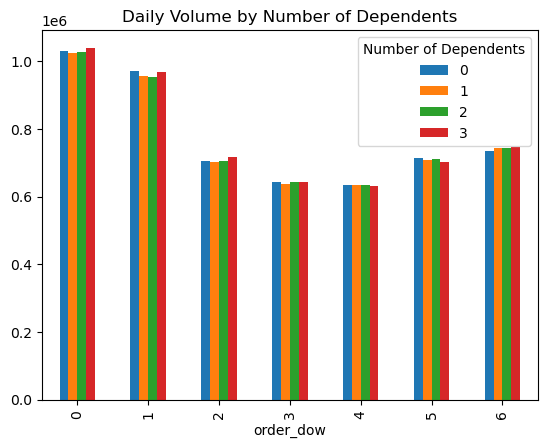

In [187]:
dep_hod = crosstab_dep_hod.sort_index().plot.bar()
dep_hod.legend(title = 'Number of Dependents', loc = 'upper right')
plt.title('Daily Volume by Number of Dependents')

In [197]:
crosstab_freq_age = pd.crosstab(df_top_dep['Age'], df_top_dep['median_prior_order'], dropna = False)

In [146]:
# Export dataframe

df_dep_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_dep_merge.pkl'))

In [147]:
# Export images

inc_dep_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_dep_bar.png'))

In [148]:
inc_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_age_dep.png'))

In [149]:
bar_inc_dep_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'inc_dep_reg.png'))

In [151]:
bar_hourly_volume.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hourly_volume.png'))

In [152]:
bar_region_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dep.png'))

In [153]:
bar_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dep.png'))

In [167]:
order_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_dow.png'))

In [177]:
loyalty_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dow.png'))